### Name- K S Deepthi Priya
#### The Spark Foundation
#### Topic : Data Science& Business Analytics

##### TASK 3: As a business manager, try to find out the weak areas where you can work to make more profit.

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading dataset from local
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
# Determining the structure of the datset
print(df.shape)
print(df.dtypes)

(9994, 13)
Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [6]:
pd.set_option('display.max_rows', 500)

## DATA CLEANING

In [7]:
#Counting columns with any NULL values
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

There are no null columns

In [10]:
df.describe()       #display summary

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [12]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [14]:
df.duplicated().sum()

17

In [15]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

# Exploratory Data Analysis

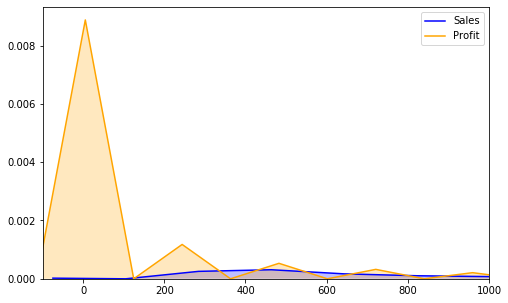

In [17]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color='blue',label='Sales',shade=True,bw=25)
sns.kdeplot(df['Profit'],color='orange',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()

Profit is more than of sale but there are some areas where profit could be increased.

### Analysis using Pairplot of each column

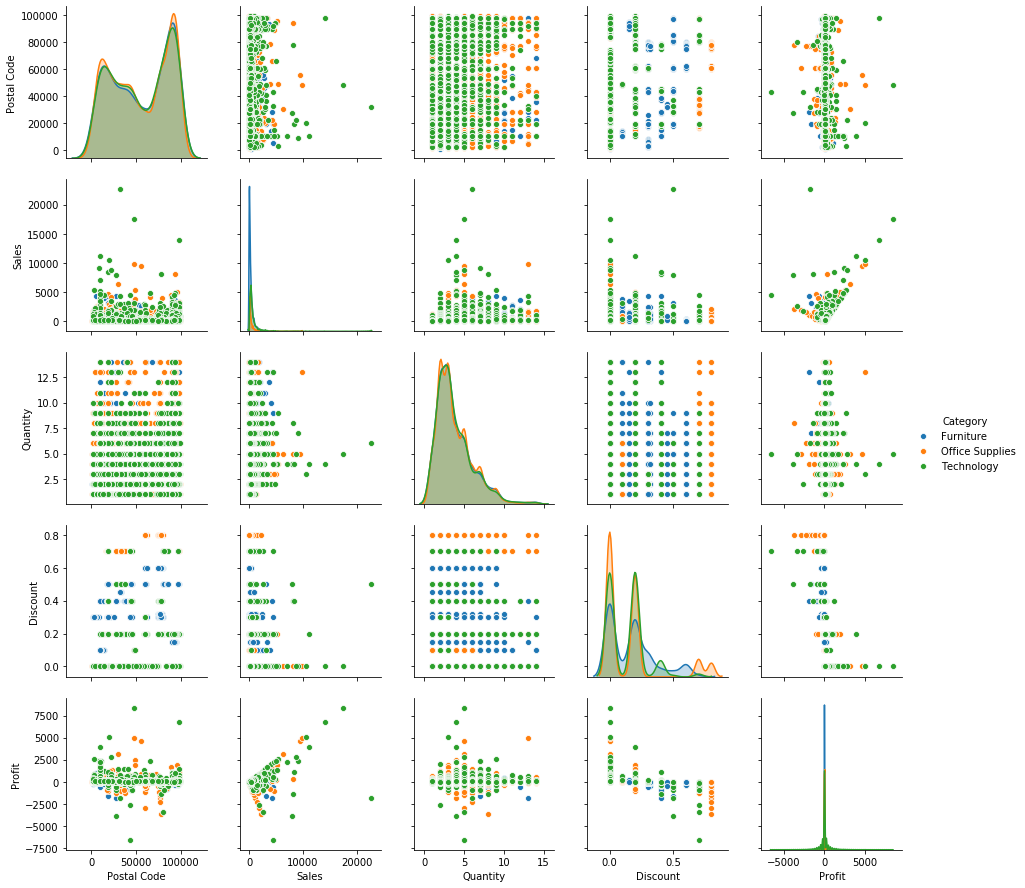

In [18]:
# Based on the Catagory
sns.pairplot(df,hue='Category')

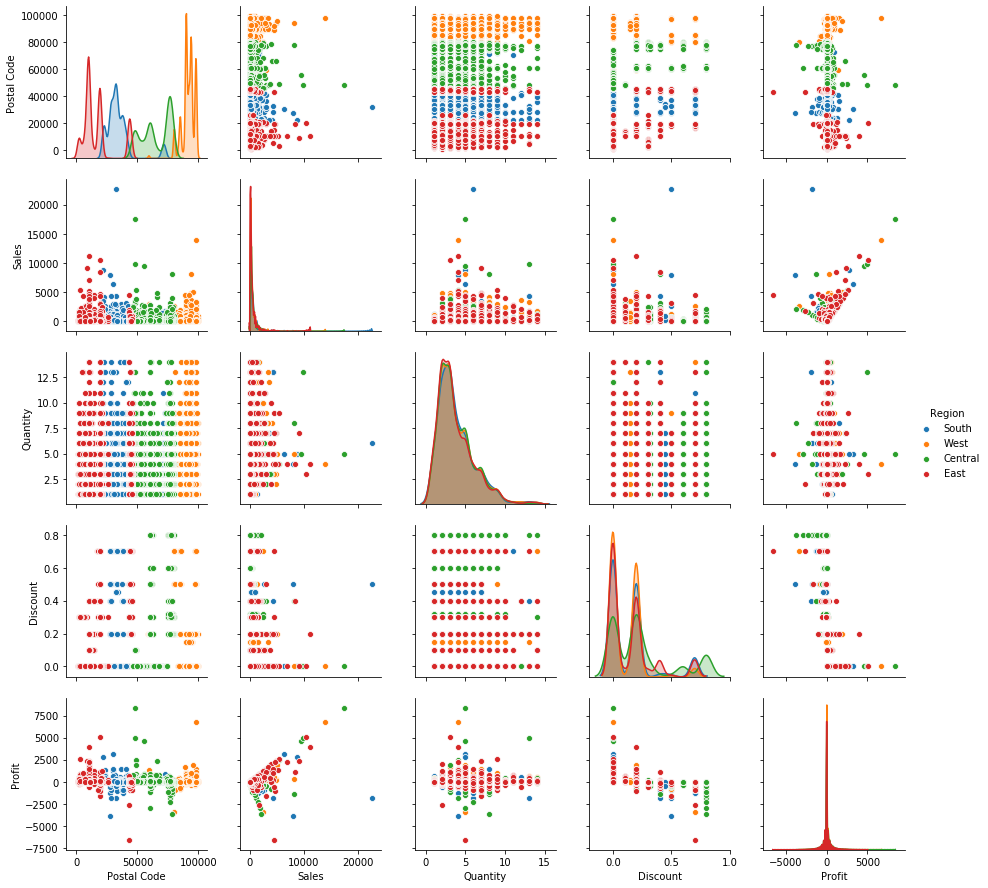

In [19]:
# Based on Region
sns.pairplot(df,hue='Region')

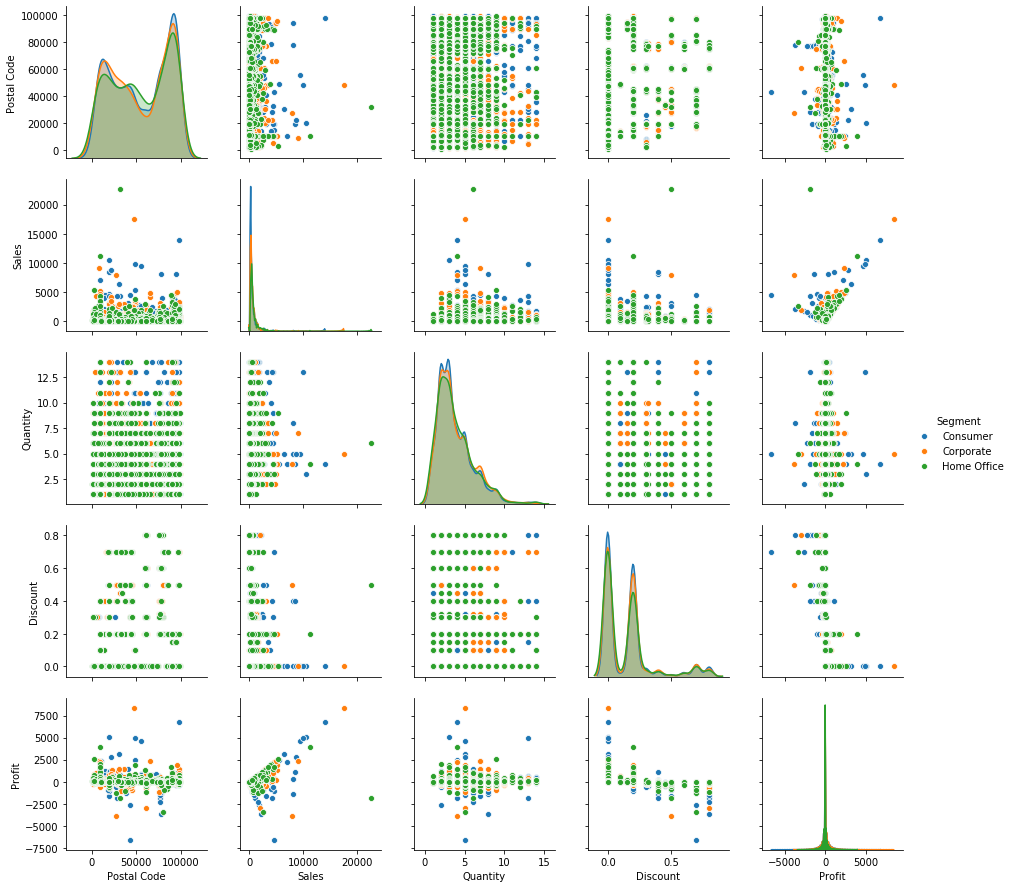

In [20]:
# Based on Segment
sns.pairplot(df,hue='Segment')

In [21]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


### Heatmap for Correlation

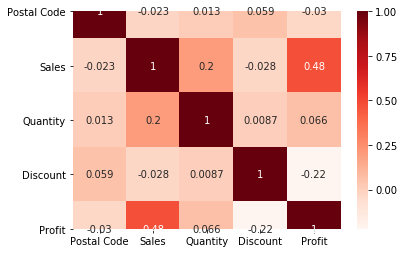

In [23]:
sns.heatmap(df.corr(),cmap='Reds',annot=True)

From above Heatmap:

* Sales and Profit are Moderately Correlated.
* Discount and Profit are Negatively Correlated
* Quantity and Profit are less Moderately Correlated.

### Count plot of each column

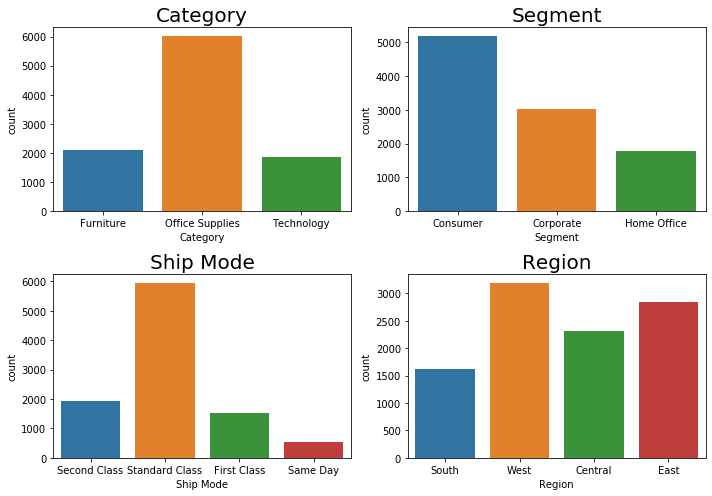

In [25]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()

Text(0.5, 1.0, 'Sub-Category')

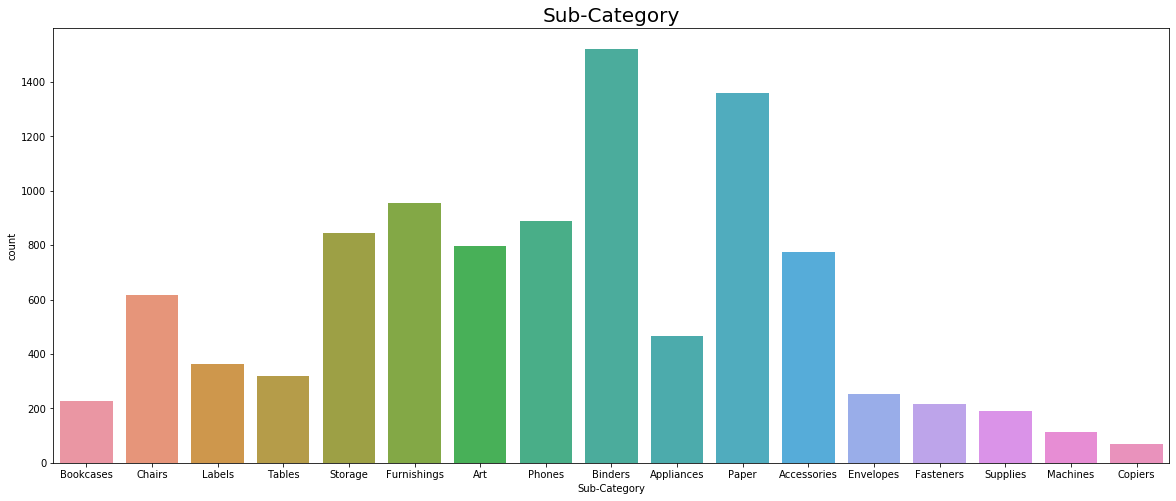

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

Text(0.5, 1.0, 'State')

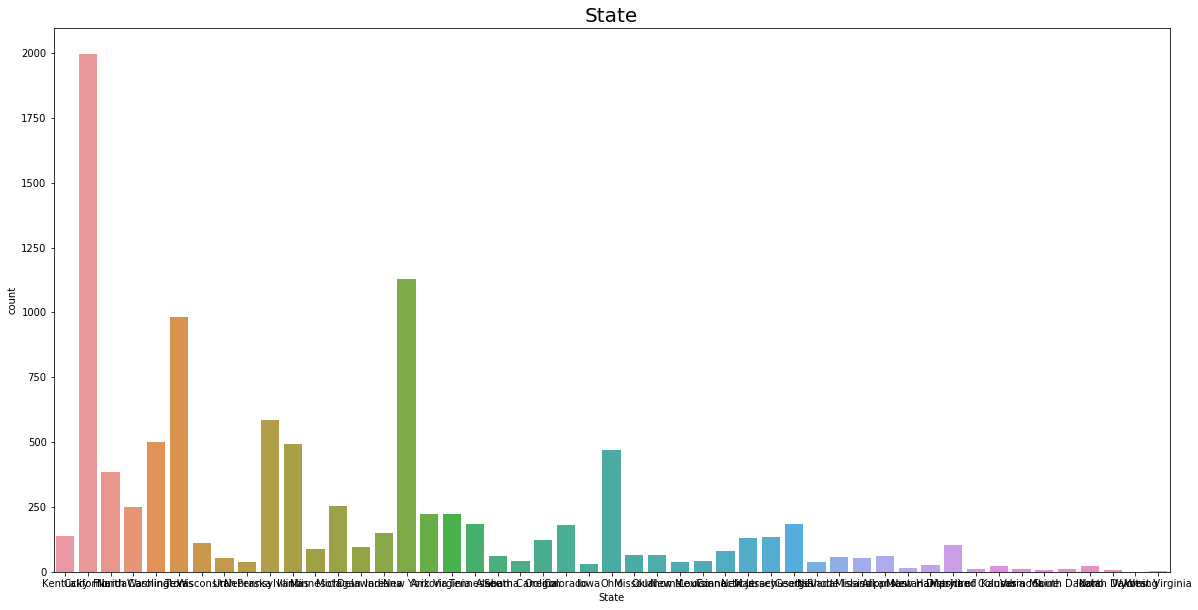

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(df['State'])
plt.title('State',fontsize=20)

Text(0.5, 1.0, 'Quantity')

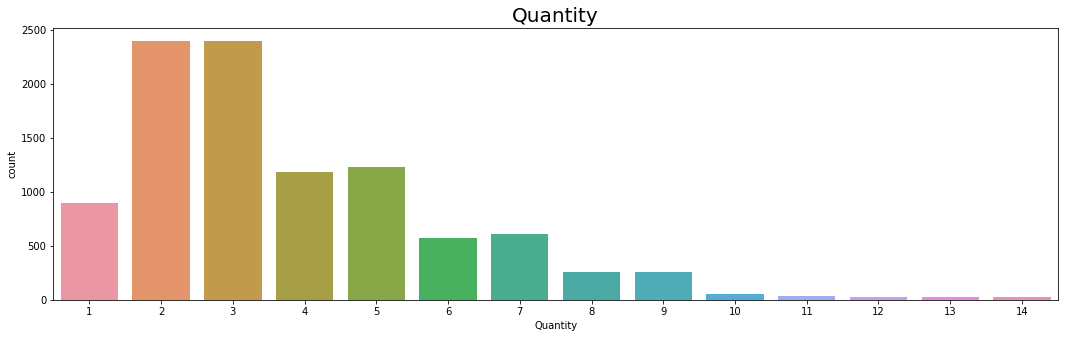

In [29]:
plt.figure(figsize=(18,5))
sns.countplot(df['Quantity'])
plt.title('Quantity',fontsize=20)

Text(0.5, 1.0, 'Discount')

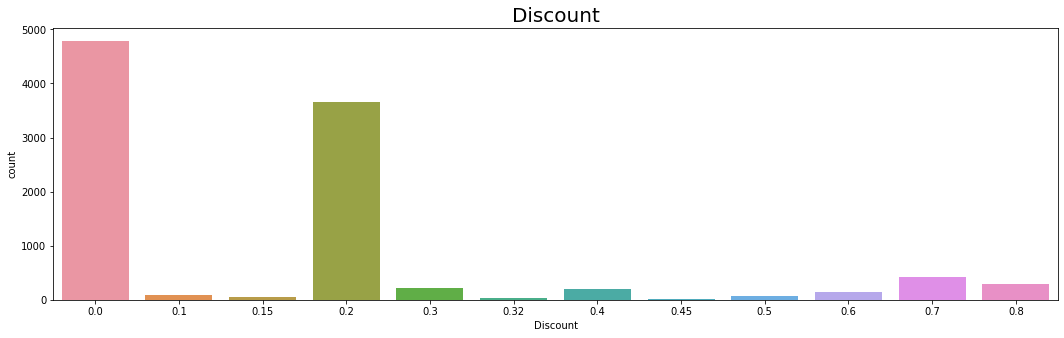

In [30]:
plt.figure(figsize=(18,5))
sns.countplot(df['Discount'])
plt.title('Discount',fontsize=20)

In [31]:
df['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

### State Wise Dealings

In [32]:
df1 = df['State'].value_counts()
df1.head(10)

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

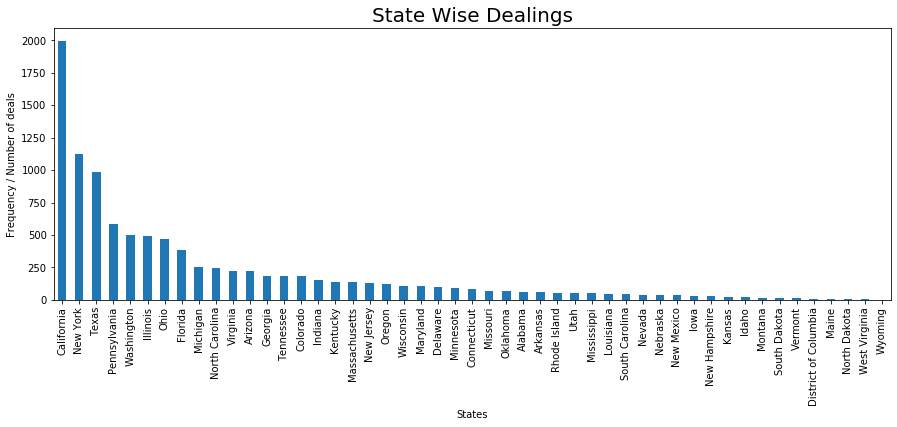

In [34]:
df1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings', fontsize = 20)
plt.show()

Here is top 3 state where deals are Highest.
* Califonia
* New York
* Texas
###### Wyoming: Lowest Number of deal

### City Wise analysis of the dealing

In [36]:
df2 = df['City'].value_counts()
df2=df2.head(50)

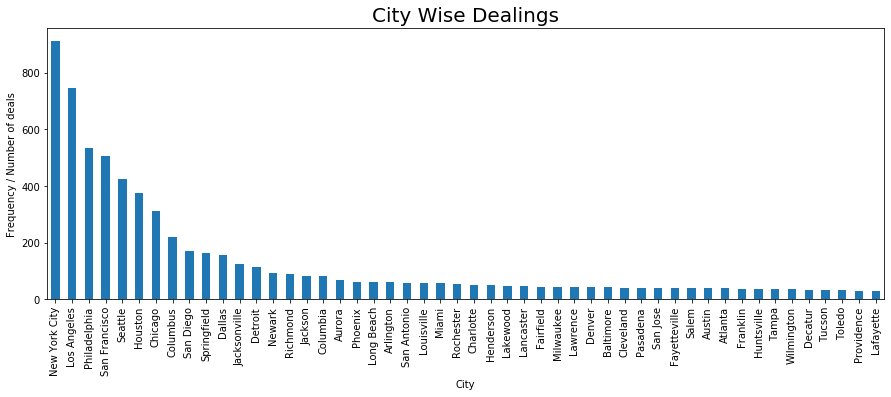

In [37]:
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings', fontsize = 20)
plt.show()

Here is top 3 city where deals are Highest.

* New York City
* Los Angeles
* Philadelphia

### Segment wise analysis of Profit, Discount and sales

In [38]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [39]:
df_segment= df.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.969279,0.158308,25.855188
Corporate,234.185781,0.158159,30.499164
Home Office,241.311234,0.147178,33.883643


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, profit')

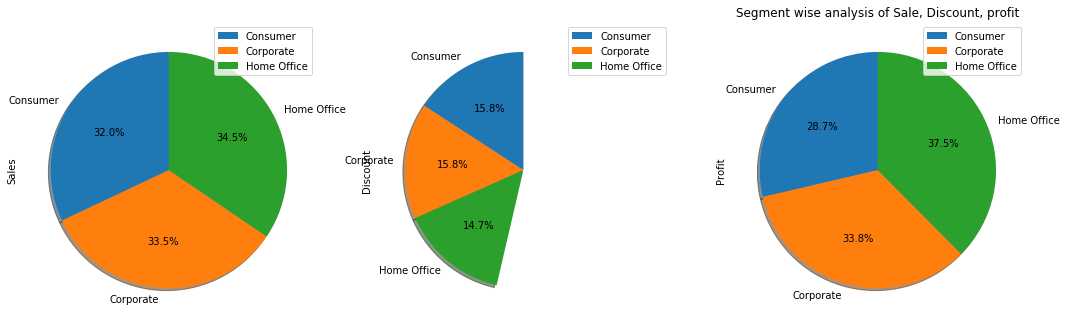

In [40]:
#1. sales 2. Discount 3. Profit
df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(18, 20),
                    startangle=90,    
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment wise analysis of Sale, Discount, profit')

### Statewise analysis of Profit Discount and sales

In [41]:
df['State'].value_counts().head()

California      1996
New York        1127
Texas            983
Pennsylvania     586
Washington       502
Name: State, dtype: int64

In [42]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,229.246629,0.072946,38.241878
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


#### State wise Profit analysis

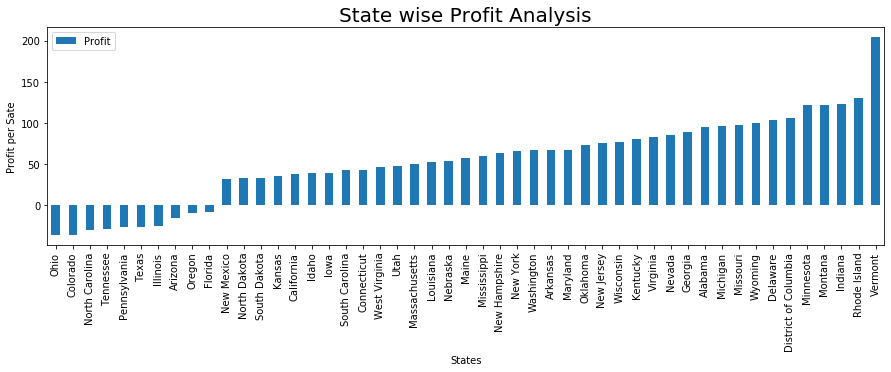

In [45]:
df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

#### State wise Sales analysis

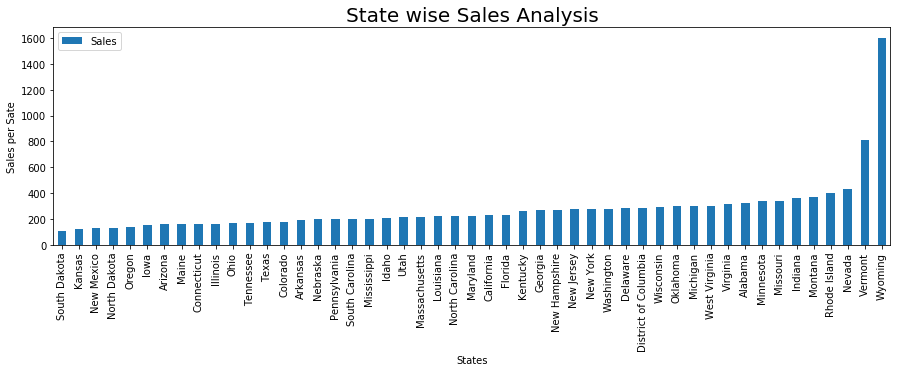

In [46]:
df_state1=df_state.sort_values('Sales')

df_state1[['Sales']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Sales Analysis', fontsize = 20)
plt.ylabel('Sales per Sate')
plt.xlabel('States')
plt.show()

* Highest amount of sales= Wyoming
* Lowest amount of sales= South Dakota

#### Statewise Discount Analysis

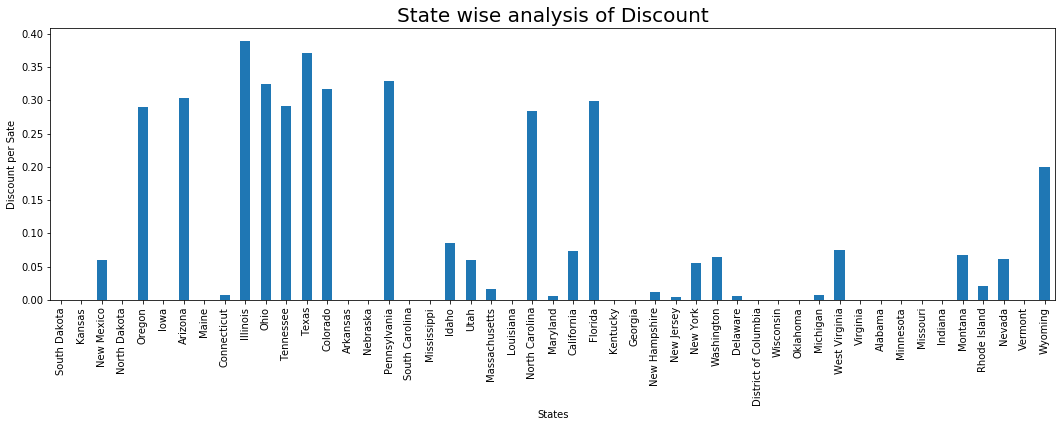

In [47]:
df_state1['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise analysis of Discount', fontsize=20)
plt.ylabel('Discount per Sate')
plt.xlabel('States')
plt.show()


* Illinois is at top

#### Citywise Analysis of the Profit

In [48]:
df_city= df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city = df_city.sort_values('Profit')
df_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

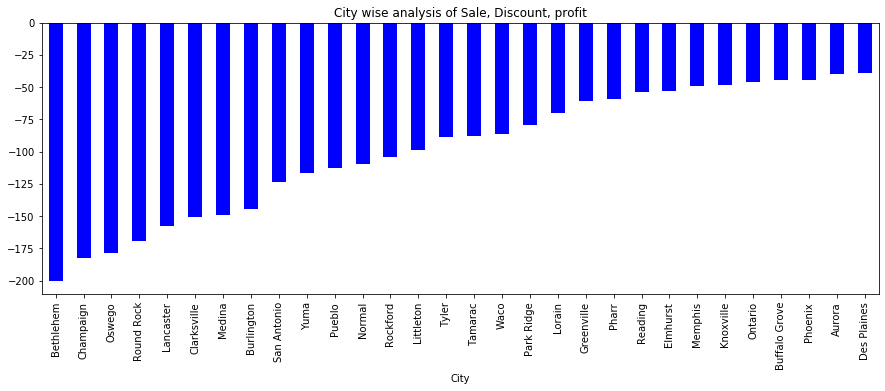

In [50]:
# Low Profit
df_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color = 'blue')
plt.title('City wise analysis of Sale, Discount, profit')

Text(0.5, 1.0, 'City wise analysis of Sale, Discount, profit')

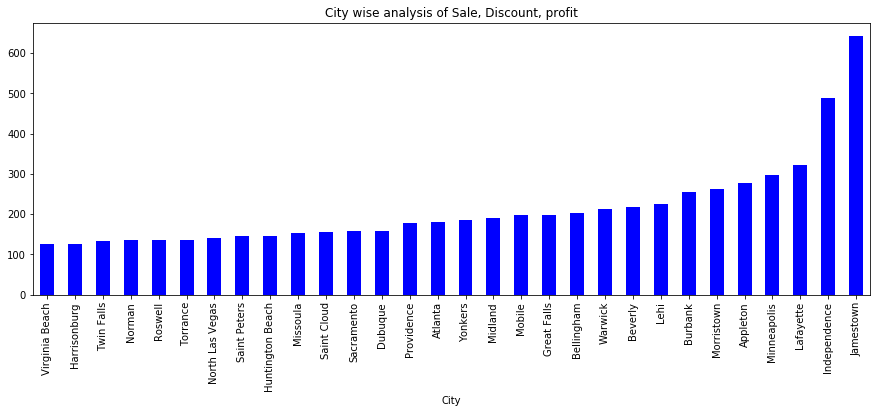

In [51]:
# High Profit
df_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color = 'blue')
plt.title('City wise analysis of Sale, Discount, profit')

### CATAGORY WISE SALES, PROFIT AND DISCOUNT ANALYSIS

In [52]:
df_category = df.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_category

,Sales,Discount,Profit
Category,,,
Furniture,350.002981,0.174027,8.697740
Office Supplies,119.550107,0.157385,20.353403
Technology,452.709276,0.132323,78.752002


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1034495C8>,
      dtype=object)

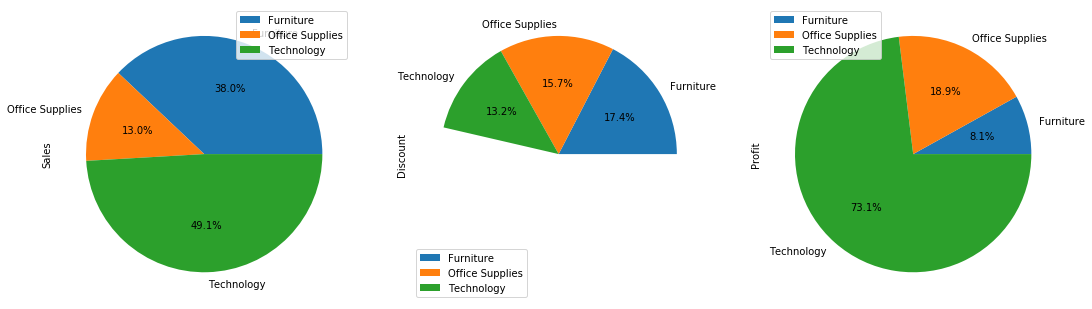

In [53]:
df_category.plot.pie(subplots=True, 
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_category.index)

* Maximum sales and Profit obtain in Technology.
* Minimum profit obtain in Furniture

#### Sub-Catagory wise Profit,Discount,Sales

In [55]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.096896,0.074969,8.207059
Binders,133.645972,0.372011,19.860710
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.971969,0.170244,43.198582
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


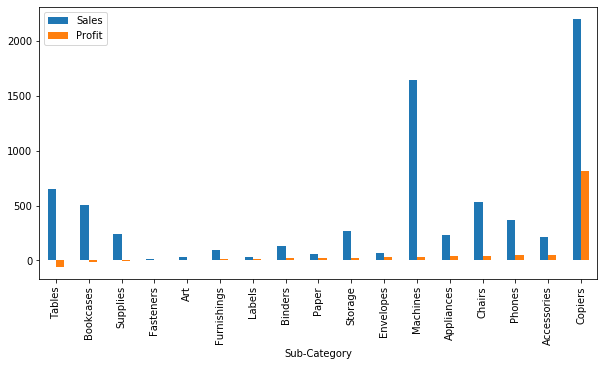

In [56]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize= (10,5),
                                                              label=['Avg Sales Price($)','Profit($)'])

* Copiers have highest Sales and Profits

#### SHIP MODE WISE ANALYSIS

In [57]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [58]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()

In [59]:
df_shipmode

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.614490,0.164587,31.850134
Same Day,236.755950,0.152675,29.283924
Second Class,236.323750,0.138626,29.565956
Standard Class,227.928858,0.160222,27.534715


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E10314F888>,
      dtype=object)

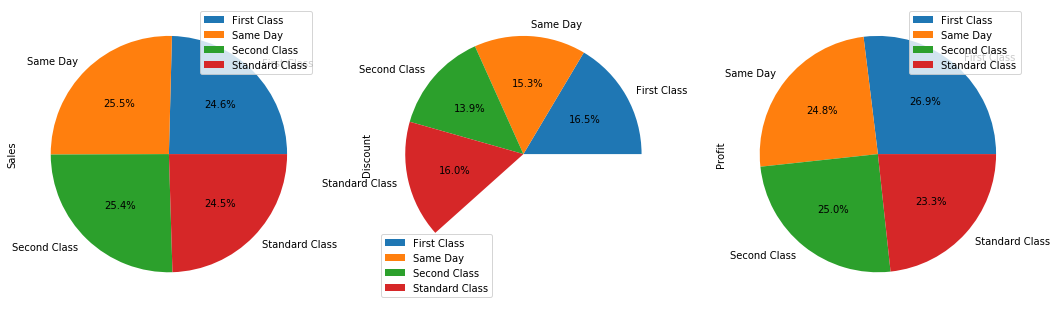

In [60]:
df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)

* Profit and Discount is high in First Class
* Sales is high for Same day ship

# Conclusion


Profit is more than that of sale but there are some areas where profit could be increased.

Profit and Discount is high in First Class

Sales is high for Same day ship

Sub-category: Copier: High Profit & sales

Sub-category: Binders , Machines and then tables have high Discount.

Category: Maximun sales and Profit obtain in Technology.

Category: Minimun profit obtain in Furniture

State: Vermont: Highest Profit

State: Ohio: Lowest Profit

Segment: Home-office: High Profit & sales

Here is top 3 city where deals are Highest.

* New York City
* Los Angeles
* Philadelphia

Sales and Profit are Moderately Correlated.

Quantity and Profit are less Moderately Correlated.

Discount and Profit are Negatively Correlated

Here is top 3 state where deals are Highest.

* Califonia
* New York
* Texas

Wyoming : Lowest Number of deal,Highest amount of sales= Wyoming

Lowest amount of sales= South Dakota